## Libraries
1. sklearn
2. imbalearn
3. numpy
4. pandas
5. matplotlib
6. seaborn
7. torch
8. statsmodels
9. scipy

Make sure you have all before running the Notebook

In [149]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import torch
import seaborn as sns
from scipy.stats import chi2_contingency 
import torch.nn as nn
from statsmodels.stats.outliers_influence import variance_inflation_factor
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn import tree

## Data Preprocessing

In [2]:
missing_values = ["n/a", "na", "--","?", ' ']
df = pd.read_csv("churn.csv",na_values = missing_values)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df2 = df.copy()

In [5]:
#Checking for all NA values
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
df = df.dropna()


Checking number of unique values in a each column. (Helps in determining the data encoding, for two-
classes, we go with ordinal encodoing, for continuos numerical values we use standard scaler, for higher unique value
classes without ordinality we use one hot encoding)

In [7]:

df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [8]:
#Dropping Customer ID as it is a variable used for unique identification
df = df.drop(["customerID"],axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
Y = df["Churn"]
Y.head()


0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [10]:
len(Y)

7032

In [11]:
#From the given data only three features are continuos: tenure, MonthlyCharges and TotalCharges
conti_var = ["tenure","MonthlyCharges","TotalCharges"]
conti_df = df[conti_var]

In [12]:
df = df.drop(["Churn"],axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [13]:
conti_df["TotalCharges"] = pd.to_numeric(conti_df["TotalCharges"], downcast="float")

In [14]:
conti_df.dtypes

tenure              int64
MonthlyCharges    float64
TotalCharges      float32
dtype: object

In [15]:
#Feature Scaling and Standardization
x = conti_df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
conti_df = pd.DataFrame(x_scaled)

In [16]:
conti_df.head()

,0,1,2
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330


In [17]:
len(conti_df)

7032

In [18]:
#Categorical Variables
cat_var = list(set(df.columns) - set(conti_var))
cat_df = df[cat_var]
cat_df.head()

,SeniorCitizen,Partner,OnlineBackup,PhoneService,MultipleLines,Dependents,gender,StreamingMovies,DeviceProtection,PaperlessBilling,TechSupport,Contract,OnlineSecurity,InternetService,StreamingTV,PaymentMethod
0,0,Yes,Yes,No,No phone service,No,Female,No,No,Yes,No,Month-to-month,No,DSL,No,Electronic check
1,0,No,No,Yes,No,No,Male,No,Yes,No,No,One year,Yes,DSL,No,Mailed check
2,0,No,Yes,Yes,No,No,Male,No,No,Yes,No,Month-to-month,Yes,DSL,No,Mailed check
3,0,No,No,No,No phone service,No,Male,No,Yes,No,Yes,One year,Yes,DSL,No,Bank transfer (automatic)
4,0,No,No,Yes,No,No,Female,No,No,Yes,No,Month-to-month,No,Fiber optic,No,Electronic check


In [19]:
#One Hot Encoding 
cat_df = pd.get_dummies(cat_df)
cat_df.head()

,SeniorCitizen,Partner_No,Partner_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,1,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,0,1,0,1,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,1,0,1,0,0,1,0,0,1,...,1,0,0,1,0,0,1,0,0,0
4,0,1,0,1,0,0,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0


In [20]:
len(conti_df), len(cat_df)

(7032, 7032)

In [21]:
#Final preprocessed data
x1 = conti_df.to_numpy()
x2 = cat_df.to_numpy()
x = np.hstack((x1,x2))
X = pd.DataFrame(x)
Y.replace({'Yes', 'No'},{1, 0}, inplace=True)

In [22]:
len(X),len(Y)

(7032, 7032)

In [23]:
#Test Train Split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=0,test_size=0.3)


# Exploratory Data Analysis

In [24]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [64]:
df2.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [65]:
df2.shape

(7043, 21)

In [66]:
df2.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [69]:
#Correlation matrix
cor = df2.corr()
print(cor)

                SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.016567        0.220173      0.102411
tenure               0.016567  1.000000        0.247900      0.825880
MonthlyCharges       0.220173  0.247900        1.000000      0.651065
TotalCharges         0.102411  0.825880        0.651065      1.000000


<AxesSubplot:>

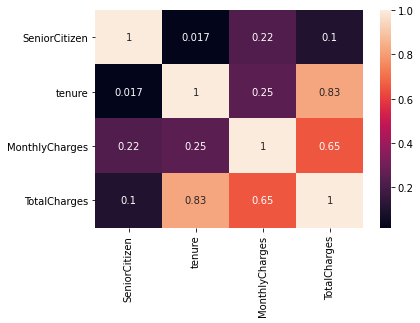

In [70]:
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)

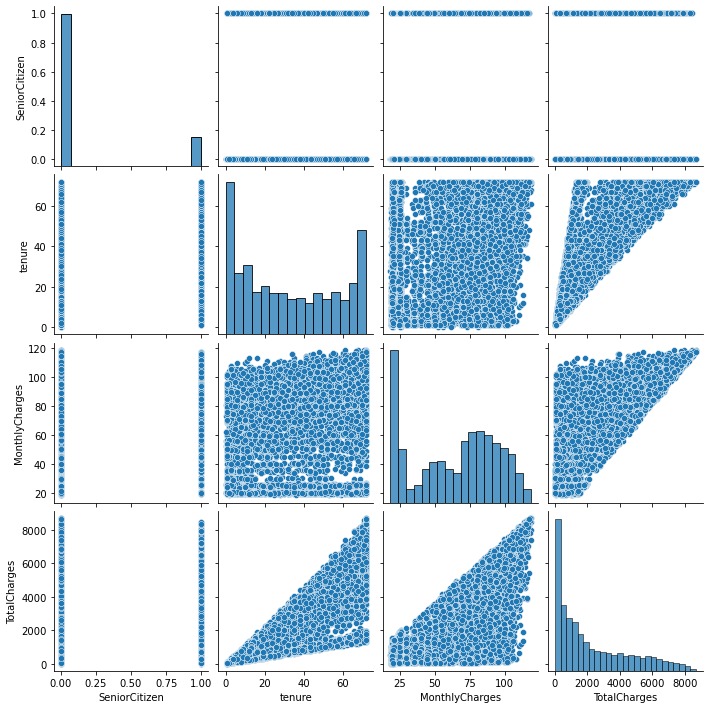

In [71]:
sns.pairplot(df2)

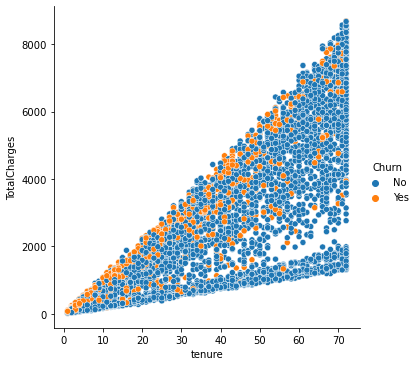

In [72]:
sns.relplot(x="tenure", y="TotalCharges", hue="Churn",data=df2)

In [88]:
cat_df2 = df[cat_var]
cat_df2.head()

16

In [124]:
le = preprocessing.LabelEncoder()
cor_mat = [le.fit_transform(cat_df2[cat_var[i]]) + 1 for i in range(len(cat_var))]

In [125]:
corr = np.array(cor_mat)

In [126]:
corr.shape

(16, 7032)

In [127]:
cor_df = pd.DataFrame(corr)

In [128]:
pd.pivot_table(cor_df,columns= cat_var)

,Contract,Dependents,DeviceProtection,InternetService,MultipleLines,OnlineBackup,OnlineSecurity,PaperlessBilling,Partner,PaymentMethod,PhoneService,SeniorCitizen,StreamingMovies,StreamingTV,TechSupport,gender
0,1,1,1,1,2,3,1,2,2,3,1,1,1,1,1,1
1,2,1,3,1,1,1,3,1,1,4,2,1,1,1,1,2
2,1,1,1,1,1,3,3,2,1,4,2,1,1,1,1,2
3,2,1,3,1,2,1,3,1,1,1,1,1,1,1,3,2
4,1,1,1,2,1,1,1,2,1,3,2,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,2,2,3,1,3,1,3,2,2,4,2,1,3,3,3,2
7028,2,2,3,2,3,3,1,2,2,2,2,1,3,3,1,1
7029,1,2,1,1,2,1,3,2,2,3,1,1,1,1,1,1
7030,1,1,1,2,3,1,1,2,2,4,2,2,1,1,1,2


In [134]:
#Measuring VIF for Continuos Features
vif_data = pd.DataFrame() 
vif_data["feature"] = conti_df.columns

# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(conti_df.values, i) for i in range(len(conti_df.columns))] 
  
print(vif_data)

   feature       VIF
0        0  6.375466
1        1  3.532329
2        2  9.859865


# Models

## Gradient Boosting without Oversampling

In [25]:
#Gradient Boosting Classifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred=gbc.predict(x_test)

In [26]:
f1 = f1_score(y_test, y_pred)
f1

0.5760649087221095

Gradient Booster Classifier Success Rate : 57.61%


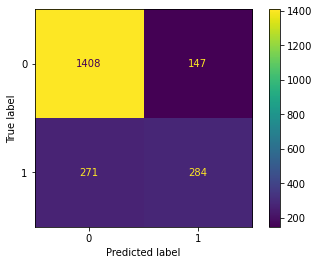

In [27]:
print("Gradient Booster Classifier Success Rate :", "{:.2f}%".format(100*f1))
plot_confusion_matrix(gbc, x_test, y_test)
plt.show()

In [28]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1679
           1       0.51      0.66      0.58       431

    accuracy                           0.80      2110
   macro avg       0.71      0.75      0.72      2110
weighted avg       0.83      0.80      0.81      2110



In [29]:
#From the above observed results we can see an undersampling issue, we can fix this with oversampling techniques like
#SMOTE or ADASYN

In [30]:
#Oversampling with SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X, Y)

In [31]:
#Test Train Split
x_train_r,x_test_r,y_train_r,y_test_r=train_test_split(X_resampled,y_resampled,random_state=0,test_size=0.3)

## Gradient Boosting Classifier with oversampling

In [32]:
#Gradient Boosting Classifier with oversampling
gbc=GradientBoostingClassifier()
gbc.fit(x_train_r,y_train_r)
y_pred=gbc.predict(x_test_r)

In [33]:
f1 = f1_score(y_test_r, y_pred)
f1

0.8611632270168855

Gradient Booster Classifier Success Rate : 86.12%


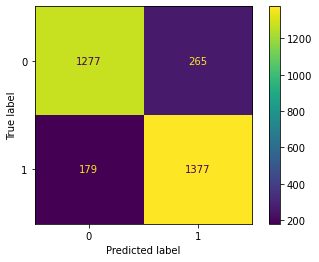

In [34]:
print("Gradient Booster Classifier Success Rate :", "{:.2f}%".format(100*f1))
plot_confusion_matrix(gbc, x_test_r, y_test_r)
plt.show()

In [35]:
print(classification_report(y_pred,y_test_r))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1456
           1       0.88      0.84      0.86      1642

    accuracy                           0.86      3098
   macro avg       0.86      0.86      0.86      3098
weighted avg       0.86      0.86      0.86      3098



## Support Vector Classifier

In [36]:
#SVM Model with Oversampling
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_train_r, y_train_r)
y_pred = clf.predict(x_test_r)

In [37]:
f1 = f1_score(y_test_r, y_pred)
f1

0.8268749999999999

SVM Classifier Success Rate : 82.69%


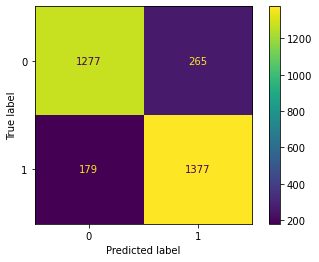

In [38]:
print("SVM Classifier Success Rate :", "{:.2f}%".format(100*f1))
plot_confusion_matrix(gbc, x_test_r, y_test_r)
plt.show()

In [39]:
print(classification_report(y_pred,y_test_r))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82      1454
           1       0.85      0.80      0.83      1644

    accuracy                           0.82      3098
   macro avg       0.82      0.82      0.82      3098
weighted avg       0.82      0.82      0.82      3098



## KNN Classifier

In [40]:
#KNN Model 
classifier = KNeighborsClassifier(n_neighbors=15)
classifier.fit(x_train_r, y_train_r)

y_pred = classifier.predict(x_test_r)

In [41]:
f1 = f1_score(y_test_r, y_pred)
f1

0.7988538681948424

In [42]:
#Results
print(confusion_matrix(y_test_r, y_pred))
print(classification_report(y_test_r, y_pred))

[[1002  540]
 [ 162 1394]]
              precision    recall  f1-score   support

           0       0.86      0.65      0.74      1542
           1       0.72      0.90      0.80      1556

    accuracy                           0.77      3098
   macro avg       0.79      0.77      0.77      3098
weighted avg       0.79      0.77      0.77      3098



KNN Classifier Success Rate : 79.89%


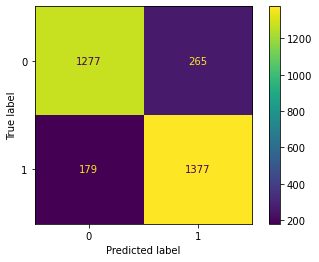

In [43]:
print("KNN Classifier Success Rate :", "{:.2f}%".format(100*f1))
plot_confusion_matrix(gbc, x_test_r, y_test_r)
plt.show()

## Random Forest Classifer

In [44]:
clf = RandomForestClassifier(n_estimators=200,criterion='entropy',min_samples_split = 5,max_depth=15, random_state=0)
clf.fit(x_train_r, y_train_r)
y_pred = clf.predict(x_test_r)

In [45]:
f1 = f1_score(y_test_r, y_pred)
f1

0.8584846587351285

In [46]:
#Results
print(confusion_matrix(y_test_r, y_pred))
print(classification_report(y_test_r, y_pred))

[[1275  267]
 [ 185 1371]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1542
           1       0.84      0.88      0.86      1556

    accuracy                           0.85      3098
   macro avg       0.86      0.85      0.85      3098
weighted avg       0.86      0.85      0.85      3098



Random Forest Classifier Success Rate : 85.85%


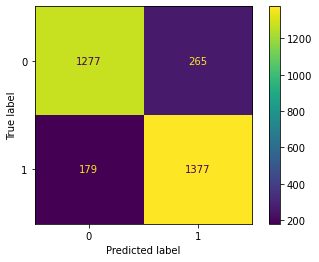

In [47]:
print("Random Forest Classifier Success Rate :", "{:.2f}%".format(100*f1))
plot_confusion_matrix(gbc, x_test_r, y_test_r)
plt.show()

## Logistic Regression 

In [48]:
lr=LogisticRegression(max_iter=10000)
lr.fit(x_train_r,y_train_r)
y_pred=lr.predict(x_test_r)

In [49]:
f1 = f1_score(y_test_r, y_pred)
f1

0.7945034353529045

In [50]:
#Results
print(confusion_matrix(y_test_r, y_pred))
print(classification_report(y_test_r, y_pred))

[[1168  374]
 [ 284 1272]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1542
           1       0.77      0.82      0.79      1556

    accuracy                           0.79      3098
   macro avg       0.79      0.79      0.79      3098
weighted avg       0.79      0.79      0.79      3098



Logistic Regression Classifier Success Rate : 79.45%


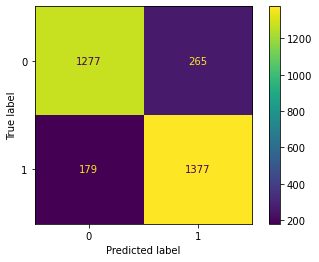

In [51]:
print("Logistic Regression Classifier Success Rate :", "{:.2f}%".format(100*f1))
plot_confusion_matrix(gbc, x_test_r, y_test_r)
plt.show()

## Neural Network Approach

In [52]:
#Converting to tensors for ML
x_train = torch.from_numpy(x_train_r.to_numpy()).float()
x_test = torch.from_numpy(x_test_r.to_numpy()).float()
y_train = torch.from_numpy(y_train_r.to_numpy()).float()
y_test = torch.from_numpy(y_test_r.to_numpy()).float()

In [53]:
x_train.shape

torch.Size([7228, 45])

In [54]:
y_train.shape

torch.Size([7228])

In [55]:
x_train

tensor([[0.5775, 0.6080, 0.3837,  ..., 0.0000, 0.0000, 0.0000],
        [0.6197, 0.6866, 0.4527,  ..., 0.0000, 1.0000, 0.0000],
        [0.0000, 0.5175, 0.0059,  ..., 0.0000, 1.0000, 0.0000],
        ...,
        [0.9014, 0.0652, 0.1826,  ..., 1.0000, 0.0000, 0.0000],
        [0.5426, 0.8217, 0.4506,  ..., 0.0000, 1.0000, 0.0000],
        [0.8873, 0.8597, 0.7929,  ..., 1.0000, 0.0000, 0.0000]])

In [56]:
#Accuracy Functions
def calculate_accuracy(y_true, y_pred):
    predicted = y_pred.ge(.5).view(-1)
    return (y_true == predicted).sum().float() / len(y_true)
def round_tensor(t, decimal_places=3):
    return round(t.item(), decimal_places)

In [57]:
#Defining Neural Network for Gender
class Churn(nn.Module):
    def __init__(self):
        super(Churn, self).__init__()
        self.fc1 = nn.Linear(45, 30)
        self.fc2 = nn.Linear(30,30)
        self.fc3 = nn.Linear(30, 10)
        self.fc4 = nn.Linear(10,1)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x
    
net = Churn()
print(net)

loss_function = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.1)

Churn(
  (fc1): Linear(in_features=45, out_features=30, bias=True)
  (fc2): Linear(in_features=30, out_features=30, bias=True)
  (fc3): Linear(in_features=30, out_features=10, bias=True)
  (fc4): Linear(in_features=10, out_features=1, bias=True)
)


In [58]:
#Model Training
for i in range(3000):
    y_pred = net(x_train)
    y_pred = torch.squeeze(y_pred)
    train_loss = loss_function(y_pred, y_train)
    
    if i % 100 == 0:
        train_acc = calculate_accuracy(y_train, y_pred)

        y_test_pred = net(x_test)
        y_test_pred = torch.squeeze(y_test_pred)

        test_loss = loss_function(y_test_pred, y_test)

        test_acc = calculate_accuracy(y_test, y_test_pred)
        print(
            f'''epoch {i}
            Train set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)}
            Test  set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}
            ''')
    optimizer.zero_grad()
    
    train_loss.backward()
    
    optimizer.step()

epoch 0
            Train set - loss: 0.695, accuracy: 0.501
            Test  set - loss: 0.696, accuracy: 0.498
            
epoch 100
            Train set - loss: 0.433, accuracy: 0.793
            Test  set - loss: 0.451, accuracy: 0.784
            
epoch 200
            Train set - loss: 0.415, accuracy: 0.803
            Test  set - loss: 0.464, accuracy: 0.776
            
epoch 300
            Train set - loss: 0.407, accuracy: 0.805
            Test  set - loss: 0.471, accuracy: 0.785
            
epoch 400
            Train set - loss: 0.398, accuracy: 0.811
            Test  set - loss: 0.488, accuracy: 0.787
            
epoch 500
            Train set - loss: 0.395, accuracy: 0.814
            Test  set - loss: 0.515, accuracy: 0.783
            
epoch 600
            Train set - loss: 0.389, accuracy: 0.815
            Test  set - loss: 0.527, accuracy: 0.777
            
epoch 700
            Train set - loss: 0.387, accuracy: 0.818
            Test  set - loss: 0.563,

In [59]:
#Saving the Model
MODEL_PATH = 'model.pth'
torch.save(net, MODEL_PATH)

C:\Users\Jainil\anaconda3\lib\site-packages\torch\serialization.py:359: UserWarning: Couldn't retrieve source code for container of type Churn. It won't be checked for correctness upon loading.
  warnings.warn("Couldn't retrieve source code for container of "


In [60]:
#Reloading the Model
net = torch.load(MODEL_PATH)

In [61]:
#Results for gender
y_pred = net(x_test)
y_pred = y_pred.ge(.5).view(-1).cpu()
y_test = y_test.cpu()

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.68      0.75      1542
         1.0       0.73      0.86      0.79      1556

    accuracy                           0.77      3098
   macro avg       0.78      0.77      0.77      3098
weighted avg       0.78      0.77      0.77      3098



Neural Network Classifier Success Rate : 79.45%


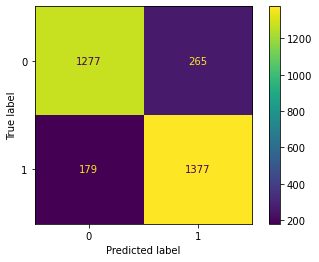

In [62]:
print("Neural Network Classifier Success Rate :", "{:.2f}%".format(100*f1))
plot_confusion_matrix(gbc, x_test, y_test)
plt.show()

# Results
From assessing all models we can say that Random Forest Classifier with some hyperparameter tuning can even outperform neural networks and gradient boosting when the dataset is small and there is no ordinality among the data points. Furthermore, Random Forest Classifiers also deal with multicollinearity problem due to row and column sampling. This is evident here. The best model that produces good classification report is Random Forest Classifier.  

## Finding the most important attributes from our best model

In [152]:
clf = RandomForestClassifier(n_estimators=200,criterion='entropy',min_samples_split = 5,max_depth=3, random_state=0)
clf.fit(x_train_r, y_train_r)
y_pred = clf.predict(x_test_r)

In [153]:
len(clf.estimators_)

200

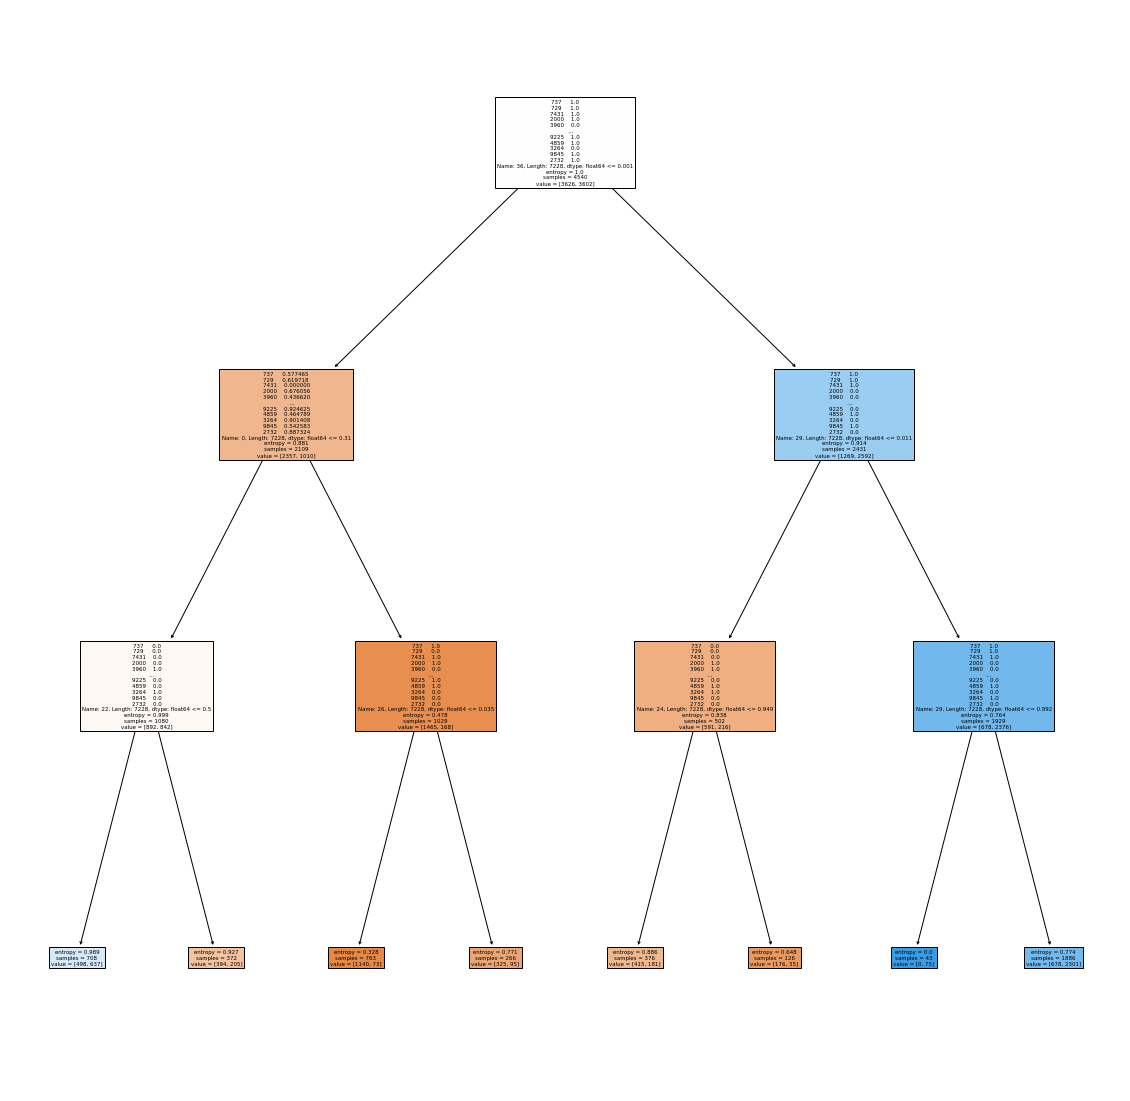

In [154]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(clf.estimators_[0], feature_names=x_train_r, filled=True)